# This dataset provides a comprehensive collection of medical data related to various forms of diabetes, including Steroid-Induced Diabetes, Neonatal Diabetes Mellitus (NDM), Prediabetes, Type 1 Diabetes, and Wolfram Syndrome. It contains multiple features that span genetic markers, environmental factors, lifestyle choices, and other relevant medical assessments. This rich dataset is designed to help researchers, data scientists, and healthcare professionals analyze and understand the complex interactions and risk factors associated with different types of diabetes.

In [2]:
#pip install wolta

In [3]:
#pip install lightgbm

In [4]:
#pip install xgboost

In [5]:
#pip install mlxtend

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from wolta.data_tools import seek_null
from wolta.data_tools import col_types
from wolta.feature_tools import list_deletings
from sklearn.cluster import KMeans

In [7]:
dia = pd.read_csv('C:/Users/VIGNESH/Downloads/archive (4)/diabetes_dataset00.csv')
dia

,Target,Genetic Markers,Autoantibodies,Family History,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,Blood Pressure,...,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Steroid Use History,Genetic Testing,Liver Function Tests,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,40,44,38,High,Healthy,124,...,No,No,Normal,18,No,Positive,Normal,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,13,1,17,High,Healthy,73,...,Yes,No,Normal,8,No,Negative,Normal,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,27,36,24,High,Unhealthy,121,...,Yes,No,Normal,15,No,Negative,Abnormal,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,8,7,16,Low,Unhealthy,100,...,No,Yes,Normal,12,No,Positive,Abnormal,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,17,10,17,High,Healthy,103,...,No,Yes,Complications,2,No,Positive,Normal,Protein Present,1770,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,Steroid-Induced Diabetes,Negative,Negative,Yes,24,38,35,High,Unhealthy,128,...,Yes,No,Normal,24,Yes,Positive,Abnormal,Normal,2575,No
69996,LADA,Positive,Positive,No,21,51,31,Low,Unhealthy,125,...,Yes,No,Normal,15,Yes,Negative,Abnormal,Ketones Present,3002,No
69997,Type 1 Diabetes,Positive,Negative,No,18,11,15,Low,Unhealthy,105,...,Yes,No,Normal,23,Yes,Positive,Normal,Protein Present,3593,No
69998,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,No,32,30,24,High,Healthy,111,...,No,No,Normal,21,No,Positive,Abnormal,Ketones Present,2592,Yes


In [8]:
dia.shape

(70000, 25)

In [9]:
dia.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Blood Glucose Levels,Weight Gain During Pregnancy,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,160.701657,15.496414,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,48.165547,9.633096,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,80.000000,0.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,121.000000,7.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,152.000000,16.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,194.000000,22.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,299.000000,39.000000,4499.000000


In [10]:
types = col_types(dia, print_columns=True)

Target: str
Genetic Markers: str
Autoantibodies: str
Family History: str
Insulin Levels: int64
Age: int64
BMI: int64
Physical Activity: str
Dietary Habits: str
Blood Pressure: int64
Cholesterol Levels: int64
Blood Glucose Levels: float64
Ethnicity: str
Smoking Status: str
Alcohol Consumption: str
History of PCOS: str
Previous Gestational Diabetes: str
Pregnancy History: str
Weight Gain During Pregnancy: int64
Steroid Use History: str
Genetic Testing: str
Liver Function Tests: str
Urine Test: str
Birth Weight: int64
Early Onset Symptoms: str


In [11]:
seeked = seek_null(dia, print_columns=True)

In [12]:
from wolta.data_tools import unique_amounts
unique_amounts(dia)

{'Target': 13,
 'Genetic Markers': 2,
 'Autoantibodies': 2,
 'Family History': 2,
 'Insulin Levels': 45,
 'Age': 80,
 'BMI': 28,
 'Physical Activity': 3,
 'Dietary Habits': 2,
 'Blood Pressure': 90,
 'Cholesterol Levels': 200,
 'Blood Glucose Levels': 220,
 'Ethnicity': 2,
 'Smoking Status': 2,
 'Alcohol Consumption': 3,
 'History of PCOS': 2,
 'Previous Gestational Diabetes': 2,
 'Pregnancy History': 2,
 'Weight Gain During Pregnancy': 40,
 'Steroid Use History': 2,
 'Genetic Testing': 2,
 'Liver Function Tests': 2,
 'Urine Test': 4,
 'Birth Weight': 3000,
 'Early Onset Symptoms': 2}

In [13]:
from wolta.feature_tools import list_deletings
dia = list_deletings(dia)

The maximum tolerated null value amount is 14000
The maximum tolerated unique value amount is 7000 in string data


In [14]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         70000 non-null  object 
 1   Genetic Markers                70000 non-null  object 
 2   Autoantibodies                 70000 non-null  object 
 3   Family History                 70000 non-null  object 
 4   Insulin Levels                 70000 non-null  int64  
 5   Age                            70000 non-null  int64  
 6   BMI                            70000 non-null  int64  
 7   Physical Activity              70000 non-null  object 
 8   Dietary Habits                 70000 non-null  object 
 9   Blood Pressure                 70000 non-null  int64  
 10  Cholesterol Levels             70000 non-null  int64  
 11  Blood Glucose Levels           70000 non-null  float64
 12  Ethnicity                      70000 non-null 

In [15]:
dia.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Insulin Levels', 'Age', 'BMI', 'Physical Activity', 'Dietary Habits',
       'Blood Pressure', 'Cholesterol Levels', 'Blood Glucose Levels',
       'Ethnicity', 'Smoking Status', 'Alcohol Consumption', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Steroid Use History',
       'Genetic Testing', 'Liver Function Tests', 'Urine Test', 'Birth Weight',
       'Early Onset Symptoms'],
      dtype='object')

In [16]:
missing_values = dia.isna().sum()
missing_values

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Blood Glucose Levels             0
Ethnicity                        0
Smoking Status                   0
Alcohol Consumption              0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Steroid Use History              0
Genetic Testing                  0
Liver Function Tests             0
Urine Test                       0
Birth Weight                     0
Early Onset Symptoms             0
dtype: int64

In [17]:
dia.isnull().sum()

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Blood Glucose Levels             0
Ethnicity                        0
Smoking Status                   0
Alcohol Consumption              0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Steroid Use History              0
Genetic Testing                  0
Liver Function Tests             0
Urine Test                       0
Birth Weight                     0
Early Onset Symptoms             0
dtype: int64

In [18]:
categorical_columns = dia.select_dtypes(include=["object","category"]).columns
print(categorical_columns)

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Physical Activity', 'Dietary Habits', 'Ethnicity', 'Smoking Status',
       'Alcohol Consumption', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Steroid Use History', 'Genetic Testing', 'Liver Function Tests',
       'Urine Test', 'Early Onset Symptoms'],
      dtype='object')


In [19]:
dia['Target'].value_counts()

Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

In [20]:
from wolta.data_tools import make_numerics
dia['Target'], outs = make_numerics(dia['Target'], space_requested=True)

print(outs)
outs = list(outs)
print(outs)

{'Steroid-Induced Diabetes': 0, 'Neonatal Diabetes Mellitus (NDM)': 1, 'Prediabetic': 2, 'Type 1 Diabetes': 3, 'Wolfram Syndrome': 4, 'LADA': 5, 'Type 2 Diabetes': 6, 'Wolcott-Rallison Syndrome': 7, 'Secondary Diabetes': 8, 'Type 3c Diabetes (Pancreatogenic Diabetes)': 9, 'Gestational Diabetes': 10, 'Cystic Fibrosis-Related Diabetes (CFRD)': 11, 'MODY': 12}
['Steroid-Induced Diabetes', 'Neonatal Diabetes Mellitus (NDM)', 'Prediabetic', 'Type 1 Diabetes', 'Wolfram Syndrome', 'LADA', 'Type 2 Diabetes', 'Wolcott-Rallison Syndrome', 'Secondary Diabetes', 'Type 3c Diabetes (Pancreatogenic Diabetes)', 'Gestational Diabetes', 'Cystic Fibrosis-Related Diabetes (CFRD)', 'MODY']


In [21]:
dia.head()

,Target,Genetic Markers,Autoantibodies,Family History,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,Blood Pressure,...,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Steroid Use History,Genetic Testing,Liver Function Tests,Urine Test,Birth Weight,Early Onset Symptoms
0,0,Positive,Negative,No,40,44,38,High,Healthy,124,...,No,No,Normal,18,No,Positive,Normal,Ketones Present,2629,No
1,1,Positive,Negative,No,13,1,17,High,Healthy,73,...,Yes,No,Normal,8,No,Negative,Normal,Glucose Present,1881,Yes
2,2,Positive,Positive,Yes,27,36,24,High,Unhealthy,121,...,Yes,No,Normal,15,No,Negative,Abnormal,Ketones Present,3622,Yes
3,3,Negative,Positive,No,8,7,16,Low,Unhealthy,100,...,No,Yes,Normal,12,No,Positive,Abnormal,Ketones Present,3542,No
4,4,Negative,Negative,Yes,17,10,17,High,Healthy,103,...,No,Yes,Complications,2,No,Positive,Normal,Protein Present,1770,No


In [22]:
types = col_types(dia)
loc = 0
numerical_features = []
for col in dia.columns:
    if types[loc] == 'str':
        dia[col] = make_numerics(dia[col])
    else:
        numerical_features.append(col)
    loc += 1

In [24]:
dia.head()

,Target,Genetic Markers,Autoantibodies,Family History,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,Blood Pressure,...,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Steroid Use History,Genetic Testing,Liver Function Tests,Urine Test,Birth Weight,Early Onset Symptoms
0,0,0,0,0,40,44,38,0,0,124,...,0,0,0,18,0,0,0,0,2629,0
1,1,0,0,0,13,1,17,0,0,73,...,1,0,0,8,0,1,0,1,1881,1
2,2,0,1,1,27,36,24,0,1,121,...,1,0,0,15,0,1,1,0,3622,1
3,3,1,1,0,8,7,16,1,1,100,...,0,1,0,12,0,0,1,0,3542,0
4,4,1,0,1,17,10,17,0,0,103,...,0,1,1,2,0,0,0,2,1770,0


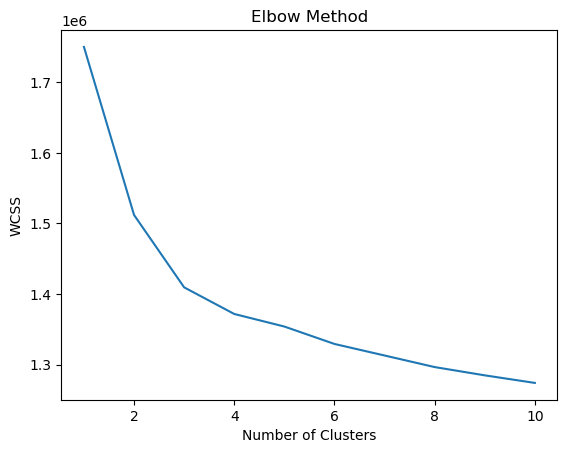

In [36]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dia)

#Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
dia.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Insulin Levels', 'Age', 'BMI', 'Physical Activity', 'Dietary Habits',
       'Blood Pressure', 'Cholesterol Levels', 'Blood Glucose Levels',
       'Ethnicity', 'Smoking Status', 'Alcohol Consumption', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Steroid Use History',
       'Genetic Testing', 'Liver Function Tests', 'Urine Test', 'Birth Weight',
       'Early Onset Symptoms'],
      dtype='object')

In [44]:
X = dia[['Genetic Markers','Autoantibodies','Family History','Insulin Levels','Age','BMI','Physical Activity','Dietary Habits','Blood Pressure','Cholesterol Levels','Blood Glucose Levels',
       'Ethnicity','Smoking Status', 'Alcohol Consumption',, 'History of PCOS','Previous Gestational Diabetes','Pregnancy History',
'Weight Gain During Pregnancy', 'Steroid Use History','Genetic Testing','Liver Function Tests','Urine Test','Birth Weight','Early Onset Symptoms']]
y = dia['Target']

SyntaxError: invalid syntax (115919481.py, line 2)

In [ ]:
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns = ['PC1', 'PC2'])
print(principalDf)

In [ ]:
dia.shape

## Data Analysis

In [ ]:
from wolta.data_tools import stat_sum

numerical_features.remove('Target')

stat_sum(dia,
         ['max', 'min', 'width', 'var', 'med'],
         only=numerical_features)

## Data Preparation

In [ ]:
y = dia['Target'].values
del dia['Target']
x = dia.values
del dia

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
del x, y

In [ ]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

In [ ]:
from wolta.model_tools import compare_models

score = compare_models('clf', 
                       ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'per', 'rdg'], 
                       ['acc', 'precision', 'f1'],
                       x_train, y_train, x_test, y_test,
                       get_result = True
    
)

In [ ]:
from wolta.model_tools import get_best_model

model = get_best_model(score, 'acc', 'clf', x_train, y_train, behavior='max-best')
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report as rep
print(rep(y_test, y_pred))